<a href="https://colab.research.google.com/github/RubyNixx/CIFAR10/blob/main/CIFAR10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NOTE: Better cross over (use and citation) of the references is needed here too (ie integrate / mention them more widely in the text blocks and narrative)**

# CIFAR-10 Dataset Analysis and Modeling

This project aims to implement and evaluate various machine learning models for image classification using the CIFAR-10 dataset. The CIFAR-10 dataset, developed by researchers at the Canadian Institute For Advanced Research, is a widely used benchmark in computer vision and machine learning research13.

The CIFAR-10 dataset consists of 60,000 32x32 color images divided into 10 distinct classes, with 6,000 images per class. These classes include airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks13. The dataset is split into 50,000 training images and 10,000 test images, providing a balanced set for model training and evaluation3.

This project will explore various aspects of machine learning, including:

- Exploratory Data Analysis and preprocessing

- Dimensionality reduction and clustering

- Implementation of multiple classification models

- Neural network architectures, including shallow networks and CNNs

- Hyperparameter optimisation

By working with CIFAR-10, we aim to gain insights into the challenges and techniques involved in image classification tasks, while comparing the performance of different machine learning approaches on a standardised dataset.

## Import Libraries

Before starting, it's essential to import the necessary libraries. Libraries are collections of pre-written code that provide functions and tools to make tasks easier and more efficient.

In [ ]:
#Import libraries required for project

# Basic data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data
!pip install --upgrade tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier

# Deep learning framework
import tensorflow as tf
from tensorflow import keras

# Suppress TensorFlow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #Display only warning and error messages to keep console tidier

# A) Exploratory Data Analysis and Preprocessing

Exploratory Data Analysis (EDA) is the process of investigating the dataset to understand its main characteristics before applying any machine learning algorithms.

### 1. Dataset Overview

The CIFAR-10 data is loaded into training and testing sets. This is a fundamental practice in machine learning. The training set is used to teach the model to recognise patterns, while the testing set is used to evaluate how well the model generalises to new, unseen data. This helps prevent overfitting (when a model memorises the training data but fails on new data) and provides a realistic estimate of model performance in real-world scenarios. (Geron, 2019; Brownlee, 2020; Goodfellow et al, 2016)

*   X_train: The training images (input data) used to train the model.

*   y_train: The labels (target outputs) for the training images.

*   X_test: The test images, which the model has never seen during training.

*   y_test: The labels for the test images, used to evaluate the model's performance.

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


### 2. Examine Dataset
By checking the shape and data types of X_train, y_train, X_test, and y_test, we confirm how many samples we have, their dimensions, and how the data is organised (Brownlee, 2020).

In [ ]:
# Analyse dataset shape and structure
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [ ]:
# Examine data types of images and labels
print(f"Image data type: {X_train.dtype}")
print(f"Label data type: {y_train.dtype}")

Image data type: uint8
Label data type: uint8


Knowing how many classes exist and their names helps us understand the classification problem and guides our model selection and evaluation.

In [ ]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print the class names
print("CIFAR-10 class names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


CIFAR-10 class names:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


By visualising the number of samples per class, we can detect if the dataset is balanced or imbalanced. Imbalanced datasets may require special handling to avoid biased models.

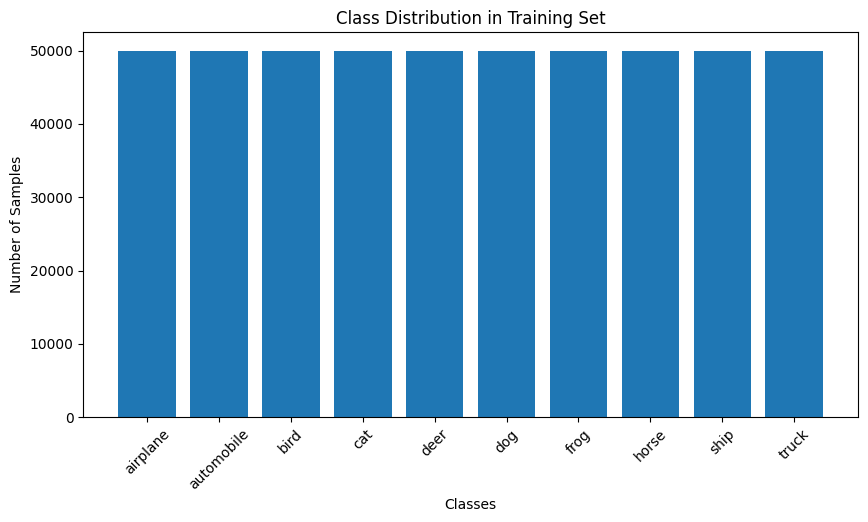

In [ ]:
# Get the class with the highest probability for each sample
y_train_classes = np.argmax(y_train, axis=1)

# Analyse class distribution
unique, counts = np.unique(y_train_classes, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

Looking at image sizes, pixel value ranges, and normalisation status ensures that the data is ready for modeling (e.g., many models expect pixel values to be between 0 and 1).

In [ ]:
# Examine image properties
print(f"Image size: {X_train[0].shape}")
print(f"Pixel value range: {X_train.min()} to {X_train.max()}")

Image size: (32, 32, 3)
Pixel value range: 0 to 255


### 3. Normalise the data

Normalising data adjusts all the values in the CIFAR-10 dataset so they fit within a standard range. For images, this involves changing the pixel values, which usually go from 0 to 255, so they all fall between 0 and 1. This makes it easier for models to process and compare the data, because every image is on the same scale (Miah et al., 2022).

One-hot encoding the labels with 'to_categorical' transforms the categorical class indices into binary vectors, ensuring that each class is treated independently and preventing the model from inferring any false ordinal relationships between categories. This is important for classification tasks where class labels have no inherent order (Endjin, 2025; scikit-learn, 2024).

Reshaping the images from their original 3D structure (32,32,3) to 1D vectors (3072 features) allows algorithms that expect flat feature vectors, such as many traditional machine learning models, to process the data correctly (Miah et al., 2022).

Converting the pixel values to float32 and normalising them to the range standardises the input, which improves model training stability and convergence by ensuring all features contribute equally and are on a comparable scale (Miah et al., 2022).

In [ ]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisation of pixel values (to [0-1] range)
X_train /= 255
X_test /= 255

### 4. Visualization

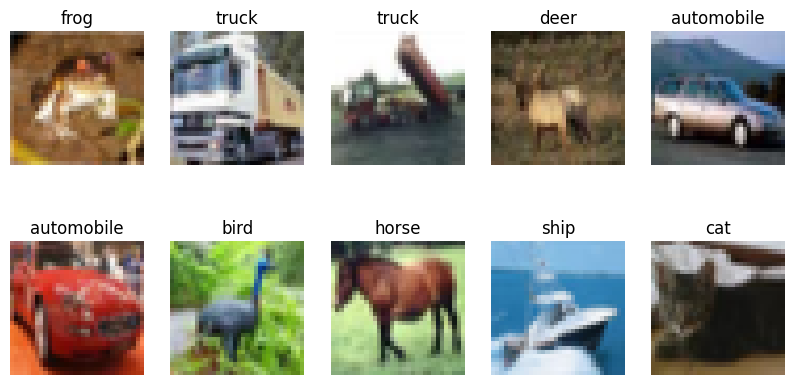

Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


In [ ]:
# Reshape the images back to 3D for visualisation
X_train_reshaped = X_train.reshape(-1, 32, 32, 3)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_reshaped[i])
    plt.title(class_names[np.argmax(y_train[i])])  # Use argmax to get the class index
    plt.axis('off')
plt.show()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


# B) Clustering

#Dimensionality Reduction & Clustering

To reduce the dimensionality of the CIFAR-10 dataset, I will first apply Principal Component Analysis (PCA) to the CIFAR-10 dataset.

PCA reduces the number of features while preserving most of the information in the dataset. This is useful for the CIFAR-10 dataset because:

- It reduces computational complexity

- It helps mitigate the "curse of dimensionality"

- It can reveal underlying structures in the data

It is commonly used to reduce the high-dimensional CIFAR-10 data (3072 features per image) to a lower-dimensional space. It also helps mitigate the "curse of dimensionality" and can reveal underlying structures in the data. (Jaadi, 2024; Kumar, 2020; Masum, 2021; Voxel52, 2023)


In [ ]:
# Reshape the training data from a 3D array to a 2D array. The CIFAR-10 dataset typically comes in a 3D format, however PCA and most machine learning algorithms expect input data to be in a 2D format, where each row represents a sample and each column represents a feature.

# After reshaping, each image is represented as a single row in the 2D array, where the number of columns equals the total number of pixels multiplied by the number of color channels (e.g., 32 * 32 * 3 = 3072 features).

# The -1 in the reshape parameter automatically calculates the correct number of columns while keeping the number of rows the same as in the original data.

X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA
#Setting n_components=0.95 ensures we retain 95% of the original variance in the data after dimensionality reduction. Retaining 95% preserves most meaningful patterns while discarding noise/redundant features. Lower thresholds (e.g., 80%) risk losing critical information; higher thresholds (e.g., 99%) retain too many components for minimal gain

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_flat)

print(f"Original shape: {X_train_flat.shape}")
print(f"Reduced shape: {X_train_pca.shape}")


Original shape: (50000, 3072)
Reduced shape: (50000, 217)


##Implement K-means clustering on reduced data

K-means clustering groups similar data points together. Applying it to the PCA-reduced data can reveal patterns or clusters in the CIFAR-10 images.

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)


##Visualise and interpret clustering results
Visualising the clustering results helps interpret how well the algorithm has grouped the images and if it aligns with the actual classes.

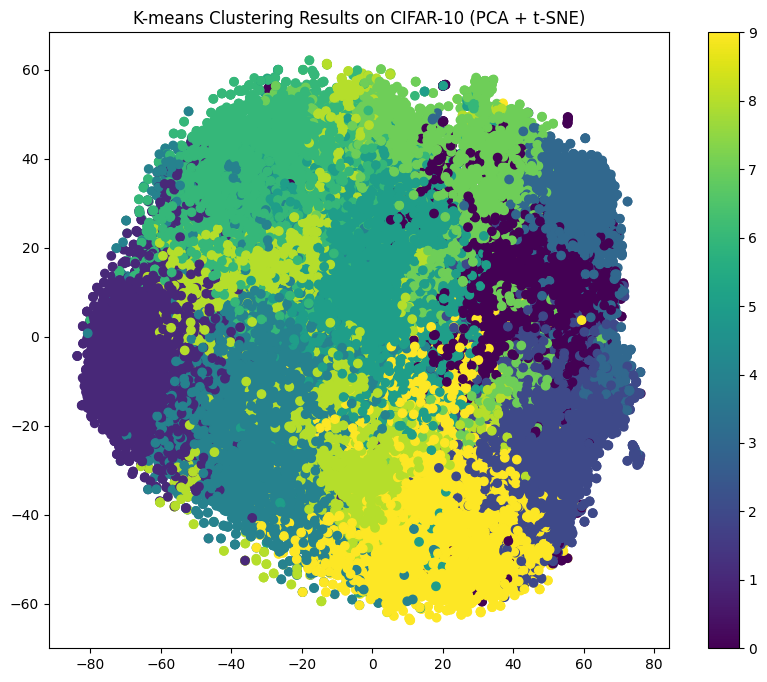

In [ ]:
# Apply t-SNE for visualisation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_pca)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Clustering Results on CIFAR-10 (PCA + t-SNE)')
plt.show()


# C) Classification models

# Classification Models Implementation

For each model (Decision Tree, Random Forest, SVM, and one additional method: K nearest neighbors):

- Initialise and train the model

- Make predictions on the test set

- Evaluate performance using appropriate metrics

- Visualise results (e.g., confusion matrix, ROC curve)

- Provide detailed explanations and interpretations

Géron, 2019; Özler, 2019; Scikit-Learn (2018, 2019, 2025); LaViale, 2023; w3schools, n.d.; Dwivedi, 2020.

In [ ]:
# Reshape the test set into a 2D array of shape (10000, 3072), where each image is flattened into a single vector of 3072 features (32 × 32 × 3 = 3072). This is necessary because PCA operates on 2D arrays, where rows represent samples and columns represent features.

# This code ensures that the test set undergoes the same PCA transformation as the training set, projecting it into the same lower-dimensional space. Without this step, the machine learning models would not work properly on the test data.
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# After reshaping, this line applies the same PCA transformation that was fitted on the training data
X_test_pca = pca.transform(X_test_flat)

# Convert one-hot encoded labels back to class indices
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

## Decision Tree Classifier
A decision tree splits the data into subsets based on feature values, creating a tree-like structure where each node represents a decision based on a feature, and each leaf represents a class label.

In [ ]:
print("\n" + "="*40)
print("Decision Tree Analysis")
print("="*40)

# Initialise and train

dt = DecisionTreeClassifier(max_depth=15, random_state=42)

#Max Deph = Ensures that the tree doesn't grow excessively large, balancing bias and variance. Set to 15 as commonly used as a starting point that can be adjusted. 15 is a moderate depth that balances model complexity and performance, and helps prevent overfitting by limiting how deep the tree can grow.

#Random State = Makes results consistent across runs, which is crucial for experiments and debugging. Could by any number, aslong as it doesnt change - 42 is popular due to its reference in "The Hitchhiker's Guide to the Galaxy".

dt.fit(X_train_pca, y_train_labels)

# Predictions
y_pred_dt = dt.predict(X_test_pca)
y_proba_dt = dt.predict_proba(X_test_pca)

# Evaluation
accuracy_dt = accuracy_score(y_test_labels, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_dt, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_dt, target_names=class_names))

#Store the classification report for comparing all the models
report_dt = classification_report(y_test_labels, y_pred_dt, target_names=class_names, output_dict=True)


Decision Tree Analysis
Accuracy: 0.2942
ROC AUC (OvR): 0.6388

Classification Report:
              precision    recall  f1-score   support

    airplane       0.37      0.40      0.39      1000
  automobile       0.35      0.32      0.33      1000
        bird       0.24      0.22      0.23      1000
         cat       0.20      0.24      0.22      1000
        deer       0.27      0.31      0.29      1000
         dog       0.24      0.23      0.23      1000
        frog       0.31      0.34      0.32      1000
       horse       0.27      0.21      0.24      1000
        ship       0.39      0.36      0.37      1000
       truck       0.33      0.30      0.31      1000

    accuracy                           0.29     10000
   macro avg       0.30      0.29      0.29     10000
weighted avg       0.30      0.29      0.29     10000



Text(0.5, 1.0, 'Confusion Matrix')

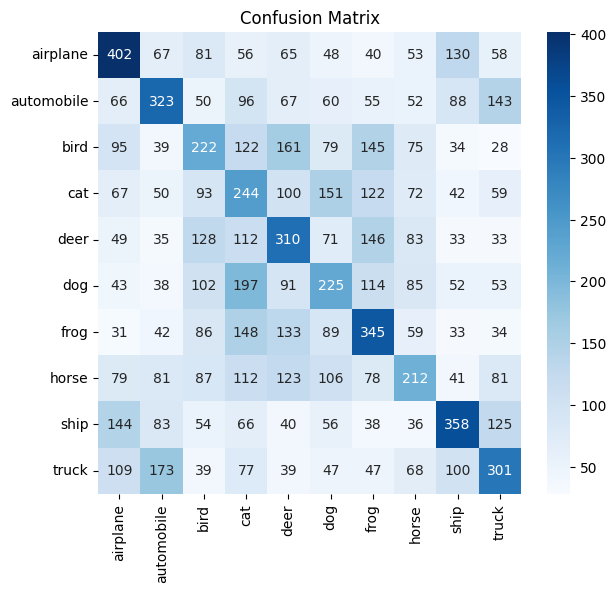

In [ ]:
# Visualisation
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_labels, y_pred_dt),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")

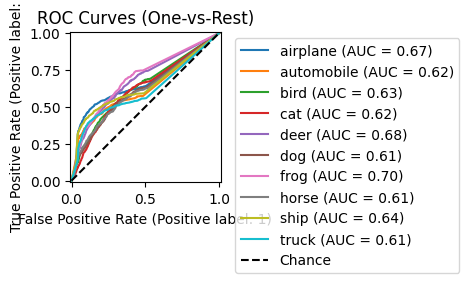

In [ ]:
plt.subplot(1, 2, 2)
for i in range(10):
    RocCurveDisplay.from_predictions(y_test_labels == i, y_proba_dt[:, i],
                                   name=f"{class_names[i]}", ax=plt.gca())
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [ ]:
print("\n" + "="*40)
print("Random Forest Analysis")
print("="*40)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train_labels)
y_pred_rf = rf.predict(X_test_pca)
y_proba_rf = rf.predict_proba(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_rf):.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_rf, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_rf, target_names=class_names))

#Store the classification report for comparing all the models
report_rf = classification_report(y_test_labels, y_pred_rf, target_names=class_names, output_dict=True)


Random Forest Analysis
Accuracy: 0.4346
ROC AUC (OvR): 0.8286

Classification Report:
              precision    recall  f1-score   support

    airplane       0.52      0.54      0.53      1000
  automobile       0.50      0.57      0.54      1000
        bird       0.32      0.27      0.29      1000
         cat       0.28      0.25      0.26      1000
        deer       0.39      0.38      0.38      1000
         dog       0.36      0.36      0.36      1000
        frog       0.46      0.51      0.49      1000
       horse       0.50      0.38      0.43      1000
        ship       0.52      0.59      0.55      1000
       truck       0.46      0.49      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.43     10000
weighted avg       0.43      0.43      0.43     10000



## Support Vector Machine

In [ ]:
print("\n" + "="*40)
print("SVM Analysis (Note: This may take 15-30 minutes)")
print("="*40)

svm = SVC(kernel='rbf', probability=True, random_state=42)

#'rbf' stands for Radial Basis Function, also known as the Gaussian kernel.
# It allows the SVM to create non-linear decision boundaries, making it versatile for complex datasets.

# By default, SVMs don't provide probability estimates for classifications.
# Setting probability to True enables probability estimation, which is necessary for certain metrics (like ROC AUC) and for getting prediction probabilities.

svm.fit(X_train_pca, y_train_labels)
y_pred_svm = svm.predict(X_test_pca)
y_proba_svm = svm.predict_proba(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_svm):.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_svm, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_svm, target_names=class_names))

#Store the classification report for comparing all the models
report_svm = classification_report(y_test_labels, y_pred_svm, target_names=class_names, output_dict=True)


SVM Analysis (Note: This may take 15-30 minutes)
Accuracy: 0.5457
ROC AUC (OvR): 0.8994

Classification Report:
              precision    recall  f1-score   support

    airplane       0.61      0.62      0.62      1000
  automobile       0.65      0.65      0.65      1000
        bird       0.43      0.41      0.42      1000
         cat       0.38      0.38      0.38      1000
        deer       0.46      0.43      0.45      1000
         dog       0.50      0.44      0.47      1000
        frog       0.53      0.65      0.58      1000
       horse       0.64      0.57      0.60      1000
        ship       0.65      0.69      0.67      1000
       truck       0.59      0.62      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.54      0.55      0.54     10000



## K-Nearest Neighbours (Additional Method)

In [ ]:
print("\n" + "="*40)
print("KNN Analysis")
print("="*40)

knn = KNeighborsClassifier(n_neighbors=5)

# The n_neighbours parameter sets the number of neighbors to use for classification.

# When making a prediction for a new data point, the algorithm will look at the 5 nearest neighbors in the training set and use their labels to determine the classification.

# The choice of 5 is a common starting point, balancing between considering too few neighbors (which might be noisy) and too many (which might blur class distinctions).

knn.fit(X_train_pca, y_train_labels)
y_pred_knn = knn.predict(X_test_pca)
y_proba_knn = knn.predict_proba(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_knn):.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_knn, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_knn, target_names=class_names))

#Store the classification report for comparing all the models
report_knn = classification_report(y_test_labels, y_pred_knn, target_names=class_names, output_dict=True)


KNN Analysis
Accuracy: 0.3625
ROC AUC (OvR): 0.7469

Classification Report:
              precision    recall  f1-score   support

    airplane       0.39      0.56      0.46      1000
  automobile       0.65      0.26      0.37      1000
        bird       0.24      0.45      0.31      1000
         cat       0.30      0.20      0.24      1000
        deer       0.25      0.50      0.34      1000
         dog       0.43      0.22      0.29      1000
        frog       0.35      0.34      0.35      1000
       horse       0.67      0.24      0.36      1000
        ship       0.44      0.65      0.52      1000
       truck       0.75      0.19      0.31      1000

    accuracy                           0.36     10000
   macro avg       0.45      0.36      0.35     10000
weighted avg       0.45      0.36      0.35     10000



,Accuracy,ROC AUC
Model,,
Decision Tree,0.2942,0.638839
Random Forest,0.4346,0.828601
SVM,0.5457,0.899447
KNN,0.3625,0.746883


##Results of each model

The performance metrics of the four different machine learning models on the CIFAR-10 dataset show:

**Accuracy:**
This measures the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.

*   SVM performs best with 54.57% accuracy
*   Random Forest is second with 43.46%
*   KNN is third with 36.25%
*   Decision Tree performs worst with 29.42%


**ROC AUC (Receiver Operating Characteristic Area Under Curve):**
This metric shows the model's ability to distinguish between classes. A higher AUC indicates better performance.

*   SVM again performs best with 0.899
*   Random Forest is second with 0.829
*   KNN is third with 0.747
*   Decision Tree is last with 0.639


**Key observations:**

*   SVM outperforms other models significantly in both metrics.

*   There's a consistent ranking across both metrics (SVM > Random Forest > KNN > Decision Tree).

*   The accuracy scores are relatively low (best is ~55%), indicating the challenging nature of the CIFAR-10 dataset for these traditional ML models.

*   The ROC AUC scores are higher than accuracy, suggesting the models are better at ranking predictions than making absolute classifications.



These results suggest that for this specific task:

*   SVM is the most effective among these models

*   More complex models (SVM, Random Forest) outperform simpler ones (Decision Tree)


In [ ]:
## -------------------------
## Comparative Analysis
## -------------------------
results = {
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [accuracy_dt,
                accuracy_score(y_test_labels, y_pred_rf),
                accuracy_score(y_test_labels, y_pred_svm),
                accuracy_score(y_test_labels, y_pred_knn)],
    'ROC AUC': [roc_auc_score(y_test_labels, y_proba_dt, multi_class='ovr'),
               roc_auc_score(y_test_labels, y_proba_rf, multi_class='ovr'),
               roc_auc_score(y_test_labels, y_proba_svm, multi_class='ovr'),
               roc_auc_score(y_test_labels, y_proba_knn, multi_class='ovr')]
}

pd.DataFrame(results).set_index('Model')


,Accuracy,ROC AUC
Model,,
Decision Tree,0.2942,0.638839
Random Forest,0.4346,0.828601
SVM,0.5457,0.899447
KNN,0.3625,0.746883


##SVM accuracy by class

When reviewing the SVM model's performance for each class in the CIFAR-10 dataset, the results showed:

**Precision** (higher number = correctly predicted positive samples to the total predicted positive samples)

*   Highest precision for automobile and ship (0.65)

*   Lowest for cat (0.38)

**Recall** (higher number = correctly predicted positive samples to all actual positive samples)

*   Highest for ship (0.69)

*   Lowest for bird (0.41)

**F1-score** (The harmonic mean of precision and recall, providing a balanced measure of performance)

*   Highest for ship (0.67)

*   Lowest for cat (0.38)


**Review:**

The model performs best on ships, with high precision, recall, and F1-score.

It struggles most with cats, having the lowest precision, recall, and F1-score.

Performance is relatively consistent across classes, with F1-scores ranging from 0.38 to 0.67.

Automobiles, airplanes, and horses also show good performance.

This report helps identify the model's strengths (e.g., ships, automobiles) and weaknesses (e.g., cats, birds), guiding potential areas for improvement in the model or dataset.

The factors that could influence why bird and cats struggle more to be classified into the correct category have been summarised below:

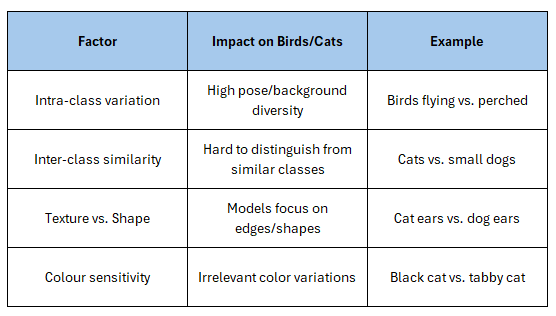

In [ ]:
# Extract F1 scores for each class
f1_scores = {
    'Decision Tree': [report_dt[class_name]['f1-score'] for class_name in class_names],
    'Random Forest': [report_rf[class_name]['f1-score'] for class_name in class_names],
    'SVM': [report_svm[class_name]['f1-score'] for class_name in class_names],
    'KNN': [report_knn[class_name]['f1-score'] for class_name in class_names]
}

# Convert to DataFrame for easier visualization
f1_scores_df = pd.DataFrame(f1_scores, index=class_names)

NameError: name 'report_dt' is not defined

In [ ]:
# Create a bar chart to visualize F1 scores per class for each model
f1_scores_df.plot(kind='bar', figsize=(12, 6))
plt.title('F1 Scores per Class for Each Model')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# D) Neural Networks

In [ ]:
# Your code here - complete for summative

# E) Hyperparameter Optimization

From the analysis of different factors that influence the images to be classified into correct categories, different feature engineering methods have been explored below with an aim to improve the low-performing categories such as birds or cats.

##Birds feature engineering

In [ ]:
from skimage.feature import hog
# Extract HOG features for feather textures
bird_features = hog(image, orientations=9, pixels_per_cell=(8,8))


NameError: name 'image' is not defined

##Cats feature engineering

In [ ]:
from skimage.feature import local_binary_pattern
# Capture fur texture patterns
cat_features = local_binary_pattern(image, P=24, R=3)

## Class specific Hyperparameter Tuning

In [ ]:
# SVM with class weights
svm = SVC(
    kernel='rbf',
    class_weight={'bird': 2.0, 'cat': 2.0},  # Double weight for underperforming classes
    probability=True
)


## Data Augmentation (Class-Specific)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

bird_cat_augmenter = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    brightness_range=[0.7,1.3]  # Address lighting variations
)


# F) Results Summary and Discussion

## **Accuracy of Models**

For the SVM, the Radial Basis Function (RBF) kernel was used, which is highly effective for creating non-linear decision boundaries. This allows SVM to capture complex relationships in the data, leading to better separation between classes at different thresholds

SVM focuses on maximising the margin between classes, which inherently improves its ability to rank instances correctly across thresholds, contributing to a higher ROC AUC. With probability=True, SVM computes probabilistic outputs that are used for ROC AUC calculation. These probabilities help in ranking instances more effectively compared to hard class predictions, although note that they do impact the length of time it takes to run the model.

Unlike metrics like accuracy or precision that depend on a fixed threshold, ROC AUC evaluates the model's ability to rank positive samples higher than negative ones across all possible thresholds. This makes it particularly useful for comparing models like SVM that excel at ranking.

When reviewing the models that perform worse, Decision Tree is prone to overfitting and createing rigid decision boundaries, which can lead to poor ranking performance and possibly the reason why it performed worse in this case.

While Random Forest is better than Decision Tree due to ensemble learning, it may not achieve the nuanced separation of classes that SVM does. And lastly, KNN struggles with high-dimensional data and relies heavily on local structure, which can limit its ranking ability.

## **Classification of different classes from images**

As explored aboce, the model performs best on ships (high recall) and trucks (high precision) but struggled more with birds and cats (low F1-score).

There's significant variation in performance across classes, indicating the SVM model's strengths and weaknesses for different types of images.

This prompted some further refinement and data augmentation, exploring feature engineering targeted at the low performing categories. Where the model needed improvement to identify the classes it struggled with, further model refinement and data augmentation was explored.

# G) References

Bhavesh Bhatt (2018). Random State in Train Test Split | Machine Learning. [online] YouTube. Available at: https://www.youtube.com/watch?v=c249O4giblM [Accessed 7 May 2025].

Biswas, K (2021). The Story Behind Random State 42. [online] Available at: https://www.linkedin.com/pulse/story-behind-random-state-42-kriti-biswas/. [Accessed 7 May 2025].

Dwivedi, R (2020). How Does K-nearest Neighbor Works In Machine Learning Classification Problem? | Analytics Steps. [online] Available at: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem [Accessed 7 May 2025].

Endjin (2025) ‘Encoding categorical data for Power BI: Label encoding vs one-hot encoding’. Available at: https://endjin.com/blog/2025/02/encoding-categorical-data-for-power-bi-label-encoding-vs-one-hot-encoding-which-encoding-technique-to-use.html [Accessed 7 May 2025].

Géron, A. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow concepts, tools, and techniques to build intelligent systems. 2nd ed. O’Reilly Media, Inc.

IBM (2023). What is principal component analysis (PCA)? [online] Ibm.com. Available at: https://www.ibm.com/think/topics/principal-component-analysis. [Accessed 7 May 2025].

Jaadi, Z. (2024). A Step by Step Explanation of Principal Component Analysis. [online] Built In. Available at: https://builtin.com/data-science/step-step-explanation-principal-component-analysis. [Accessed 7 May 2025].

Kharwal, A. (2020). Why Random_state=42 in Machine Learning? [online] Available at: https://thecleverprogrammer.com/2020/12/17/why-random_state42-in-machine-learning/. [Accessed 7 May 2025].

Kumar, A. (2020). PCA Explained Variance Concepts with Python Example. [online] Data Analytics. Available at: https://vitalflux.com/pca-explained-variance-concept-python-example/. [Accessed 7 May 2025].

LaViale, T. (2023). Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. [online] Arize AI. Available at: https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/. [Accessed 7 May 2025].

Masum, M. & Laval, P.B. (2021). Fusion-Net: A Deep Neural Network Framework for Image Classification. [online] Kennesaw State University. Available at: https://digitalcommons.kennesaw.edu/cgi/viewcontent.cgi?article=1026&context=dataphdgreylit [Accessed 7 May 2025].

Miah, M., Rahman, M., & Rahman, M. (2022) ‘A review: Data pre-processing and data augmentation techniques’. Available at: http://ui.adsabs.harvard.edu/abs/2022GloTP...3...91M/abstract [Accessed 7 May 2025].

Özler, H. (2019). Decision Tree Adventures 2 - Explanation of Decision Tree Classifier Parameters. [online] Medium. Available at: https://medium.datadriveninvestor.com/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28. [Accessed 7 May 2025].

Quora. (2019). Why do we choose random state as 42 very often during training a machine learning model? [online] Available at: https://www.quora.com/Why-do-we-choose-random-state-as-42-very-often-during-training-a-machine-learning-model [Accessed 7 May 2025].

scikit-learn (2024) ‘OneHotEncoder - scikit-learn 1.6.1 documentation’. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html [Accessed 7 May 2025].

Scikit-Learn (2018). 1.10. Decision Trees - scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/tree.html#tree. [Accessed 7 May 2025].

Scikit-Learn (2018). 1.10. Ensemble - scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/ensemble.html [Accessed 7 May 2025].

Scikit-Learn (2018). sklearn.ensemble.RandomForestClassifier - scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed 7 May 2025].

Scikit-Learn (2019). sklearn.neighbors.KNeighborsClassifier - scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. [Accessed 7 May 2025].

Scikit-Learn (2025). 1.10. Decision Trees. [online] Available at: https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use [Accessed 7 May 2025].

Scipy.org. (2018). numpy.random.RandomState - NumPy v1.15 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html [Accessed 7 May 2025].

Voxel51 (2023). How to Cluster Images: Techniques and Applications. [online] Available at: https://voxel51.com/blog/how-to-cluster-images/ [Accessed 7 May 2025].

w3schools (n.d.). Python Machine Learning - K-nearest neighbors (KNN). [online] www.w3schools.com. Available at: https://www.w3schools.com/python/python_ml_knn.asp. [Accessed 7 May 2025].